In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_img=x_train[0]
single_img.shape

(28, 28)

In [6]:
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

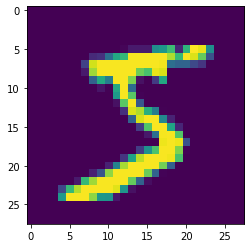

In [7]:
plt.imshow(single_img)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example=to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test=to_categorical(y_test)

In [15]:
y_cat_train=to_categorical(y_train)

In [16]:
x_train=x_train/255

In [17]:
x_test=x_test/255

In [18]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

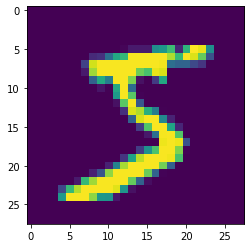

In [19]:
plt.imshow(x_train[0])

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_train=x_train.reshape(60000,28,28,1)

In [22]:
x_test=x_test.reshape(10000,28,28,1)

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [25]:
model=Sequential()
#padding can be valid or same ,here we have size of img 28 by 28 and pur kernel size is 4 so 28/4=7 ie a perfect no so there will be np overshooting and our kernel will stride easily so we choose valid otherwise choose same.
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu',padding='valid'))
#take the max value from the pool
model.add(MaxPool2D(pool_size=(2,2)))
#now we flatten the img ie 28*28
model.add(Flatten())
#use relu for hidden layers
model.add(Dense(128,activation='relu'))
#use softmax for output useful in multiple classification and its probalities sum upto 1.
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam')

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [28]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1274 - val_loss: 0.0522
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0432 - val_loss: 0.0489
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0277 - val_loss: 0.0454
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0193 - val_loss: 0.0330
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0124 - val_loss: 0.0451


In [29]:

losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

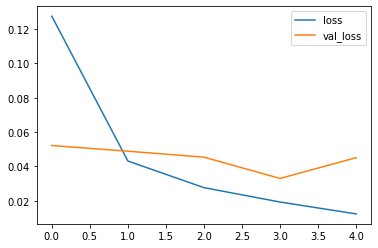

In [30]:
losses.plot()

In [31]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0451


0.04511132836341858

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
predictions=np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 1s 3ms/step


In [34]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [35]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       980\n           1       0.98      1.00      0.99      1135\n           2       0.99      0.98      0.99      1032\n           3       0.99      0.99      0.99      1010\n           4       0.99      0.99      0.99       982\n           5       0.99      0.98      0.98       892\n           6       0.99      0.98      0.99       958\n           7       0.97      0.99      0.98      1028\n           8       1.00      0.97      0.98       974\n           9       0.99      0.98      0.98      1009\n\n    accuracy                           0.99     10000\n   macro avg       0.99      0.99      0.99     10000\nweighted avg       0.99      0.99      0.99     10000\n'

In [36]:
confusion_matrix(y_test,predictions)

array([[ 978,    1,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1133,    0,    0,    0,    0,    1,    0,    1,    0],
       [   1,    8, 1008,    1,    1,    0,    0,   13,    0,    0],
       [   0,    1,    0, 1003,    0,    3,    0,    2,    0,    1],
       [   0,    0,    0,    0,  975,    0,    2,    0,    1,    4],
       [   2,    0,    0,   12,    0,  872,    4,    1,    1,    0],
       [   9,    3,    0,    0,    2,    1,  942,    0,    1,    0],
       [   0,    1,    4,    0,    0,    0,    0, 1022,    0,    1],
       [   7,    2,    2,    2,    0,    2,    1,    4,  949,    5],
       [   3,    3,    0,    0,    3,    2,    0,   11,    0,  987]],
      dtype=int64)

In [37]:
new=x_test[0]

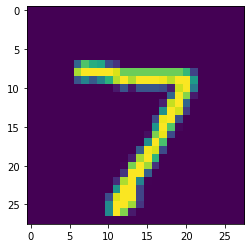

In [38]:
plt.imshow(new.reshape(28,28))

In [39]:
(np.argmax(model.predict(new.reshape(1,28,28,1)),axis=1))

1/1 [==============================] - 0s 15ms/step


array([7], dtype=int64)

1/1 [==============================] - 0s 1ms/step


array([2], dtype=int64)

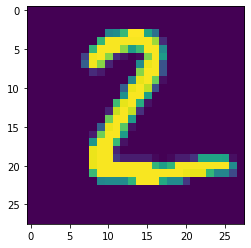

In [40]:
new=x_test[1]
plt.imshow(new.reshape(28,28))
(np.argmax(model.predict(new.reshape(1,28,28,1)),axis=1))